**Coursebook: Classification in Machine Learning II**

- Part 8 of Data Visualization and Machine Learning for PT Sinar Mas Mining
- Course Length: 6 hours
- Last Updated : December 2022

___

- Developed by [Algoritma](https://algorit.ma)'s product division and instructors team

# Background

The coursebook is part of the **Data Science in Python Specialization** prepared by [Algoritma](https://algorit.ma). The coursebook is intended for a restricted audience only, i.e. the individuals and organizations having received this coursebook directly from the training organization. It may not be reproduced, distributed, translated or adapted in any form outside these individuals and organizations without permission.

Algoritma is a data science education center based in Jakarta. We organize workshops and training programs to help working professionals and students gain mastery in various data science sub-fields: data visualization, machine learning, data modeling, statistical inference etc.

## Training Objectives

In this workshop we'll learn to apply some of the most widely used machine learning algorithms today, such as decision tree, random forest, and boosting algorithm. We will also discover the tradeoff between model interpretability and performance, and will learn to exploit the advantages of ensemble-based methods: some of the most competitive machine learning algorithms. This coursebook is intended for participants who have completed the preceding courses offered in the **Data Science in Python Specialization**. This is the fourth course, **Classification in Machine Learning II** 

The coursebook focuses on:

- **Decision Tree**
    - Splitting Criterion (CART Algorithm)
    - Interpretation
    - Application of Decision Tree (Machine Learning Workflow)

- **Modeling Improvement Technique**
    - Evaluation Metrics
    - Sampling
    - Regularization
    - k-fold Cross Validation
    - Hyperparameter Search

- **Ensemble-based Methods**
    - Random Forest
    
The final part of this course is a Graded Asssignment, where you are expected to apply all that you've learned on a new dataset, and attempt the given questions.

# Overview

HR analytics is revolutionizing how human resources departments operate, leading to higher efficiency and better overall results. Human resources have been using analytics for years. However, the collection, processing, and analysis of data have been largely manual, and given the nature of human resources dynamics and HR KPIs, the approach has been constraining HR. Therefore, it is surprising that HR departments woke up to the utility of machine learning so late in the game. In this opportunity, we will do predictive analytics to identify the employees most likely to get promoted.

Your client is a large MNC, and they have nine broad verticals across the organization. One of the problems your client faces is identifying the right people for promotion (only for manager positions and below) and preparing them in time. Currently the process, they are following are:

1. They first identify a set of employees based on recommendations/ past performance
2. Selected employees go through a separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
3. At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed more significant than 60% are considered), etc.,

Employee gets a promotion For the process mentioned above, the last promotions are only announced after the evaluation, leading to a delay in transition to their new roles. Hence, the company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle. They have provided multiple attributes around employees’ past and current performance along with demographics. Now, The task is to predict whether a potential promotee at the checkpoint in the test set will be promoted or not after the evaluation process

# Decision Tree Concept

Decision trees and tree-based models are powerful, incredibly versatile and represent one of the most popular choice for machine learning tasks. Their output are also a powerful form of representing rules, which has the benefit of being interpretable and adaptable to almost any scenario.  

Decision trees, random forests and other tree-based models are so widely used it's behind many of the technology we use today. It's behind the face recognition feature in iOS devices, and is what Microsoft and Xbox engineers chose to implement when it needs its Kinect to "quickly and accurately predict 3D positions of body joints from a single depth image using no temporal information." Reference: [Real-Time Human Pose Recognition in Parts from Single Depth Images](http://research.microsoft.com/pubs/145347/BodyPartRecognition.pdf)

The whitepaper authors and researchers (linked above) observed that by using decision trees, they were able to perform their tasks in order of magnitude faster; As they compare it to a nearest neighbor + chamfer matching approach they still achieve more accurate results while being 100x faster. 

Decision trees are the representation of "rule", that we can easily understand in real world. In sort, it's a bunch of `if-then-else` statement. If you ever create a rule in deciding what phone to buy, and then ended up in splitting phone type based on the need, you already created a decision tree. In the example below, you'll see the common meme about choosing an OS, described in decision tree.

![](assets/os_meme.png)

In most cases, decision trees and its derivatives considered to be the one of the most powerful yet light models in classification problems.

## Iris Dataset

For an illustration, imagine we want to build a simple model that classify different specifies of iris flower based on the flower's sepal and petal measurements:

![](assets/iris.png)

In [498]:
from sklearn.datasets import load_iris
X_iris, y_iris = load_iris(return_X_y=True, as_frame=True)
X_iris.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [499]:
y_iris.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [500]:
y_label = load_iris()['target_names']
y_label

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Model Fitting

We can use the `DecisionTreeClassifier` class from `sklearn.tree` package to create a decision tree model. The `.fit()` method takes the **training data** as arguments, which can be one array (features only) in the case of unsupervised learning, or two arrays (features and target) in the case of supervised learning.

In [501]:
# https://scikit-learn.org/stable/modules/tree.html
from sklearn.tree import DecisionTreeClassifier

# model initialization
dt_iris = DecisionTreeClassifier(criterion='entropy', random_state=123)

# training model
dt_iris.fit(X_iris, y_iris)

DecisionTreeClassifier(criterion='entropy', random_state=123)

## Tree Interpretation

We proceed to interpret the model by export the rules as text or plot the tree as `matplotlib` object:

In [502]:
from sklearn.tree import export_text
iris_rules = export_text(
    decision_tree=dt_iris,
    feature_names=X_iris.columns.to_list())
print(iris_rules)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



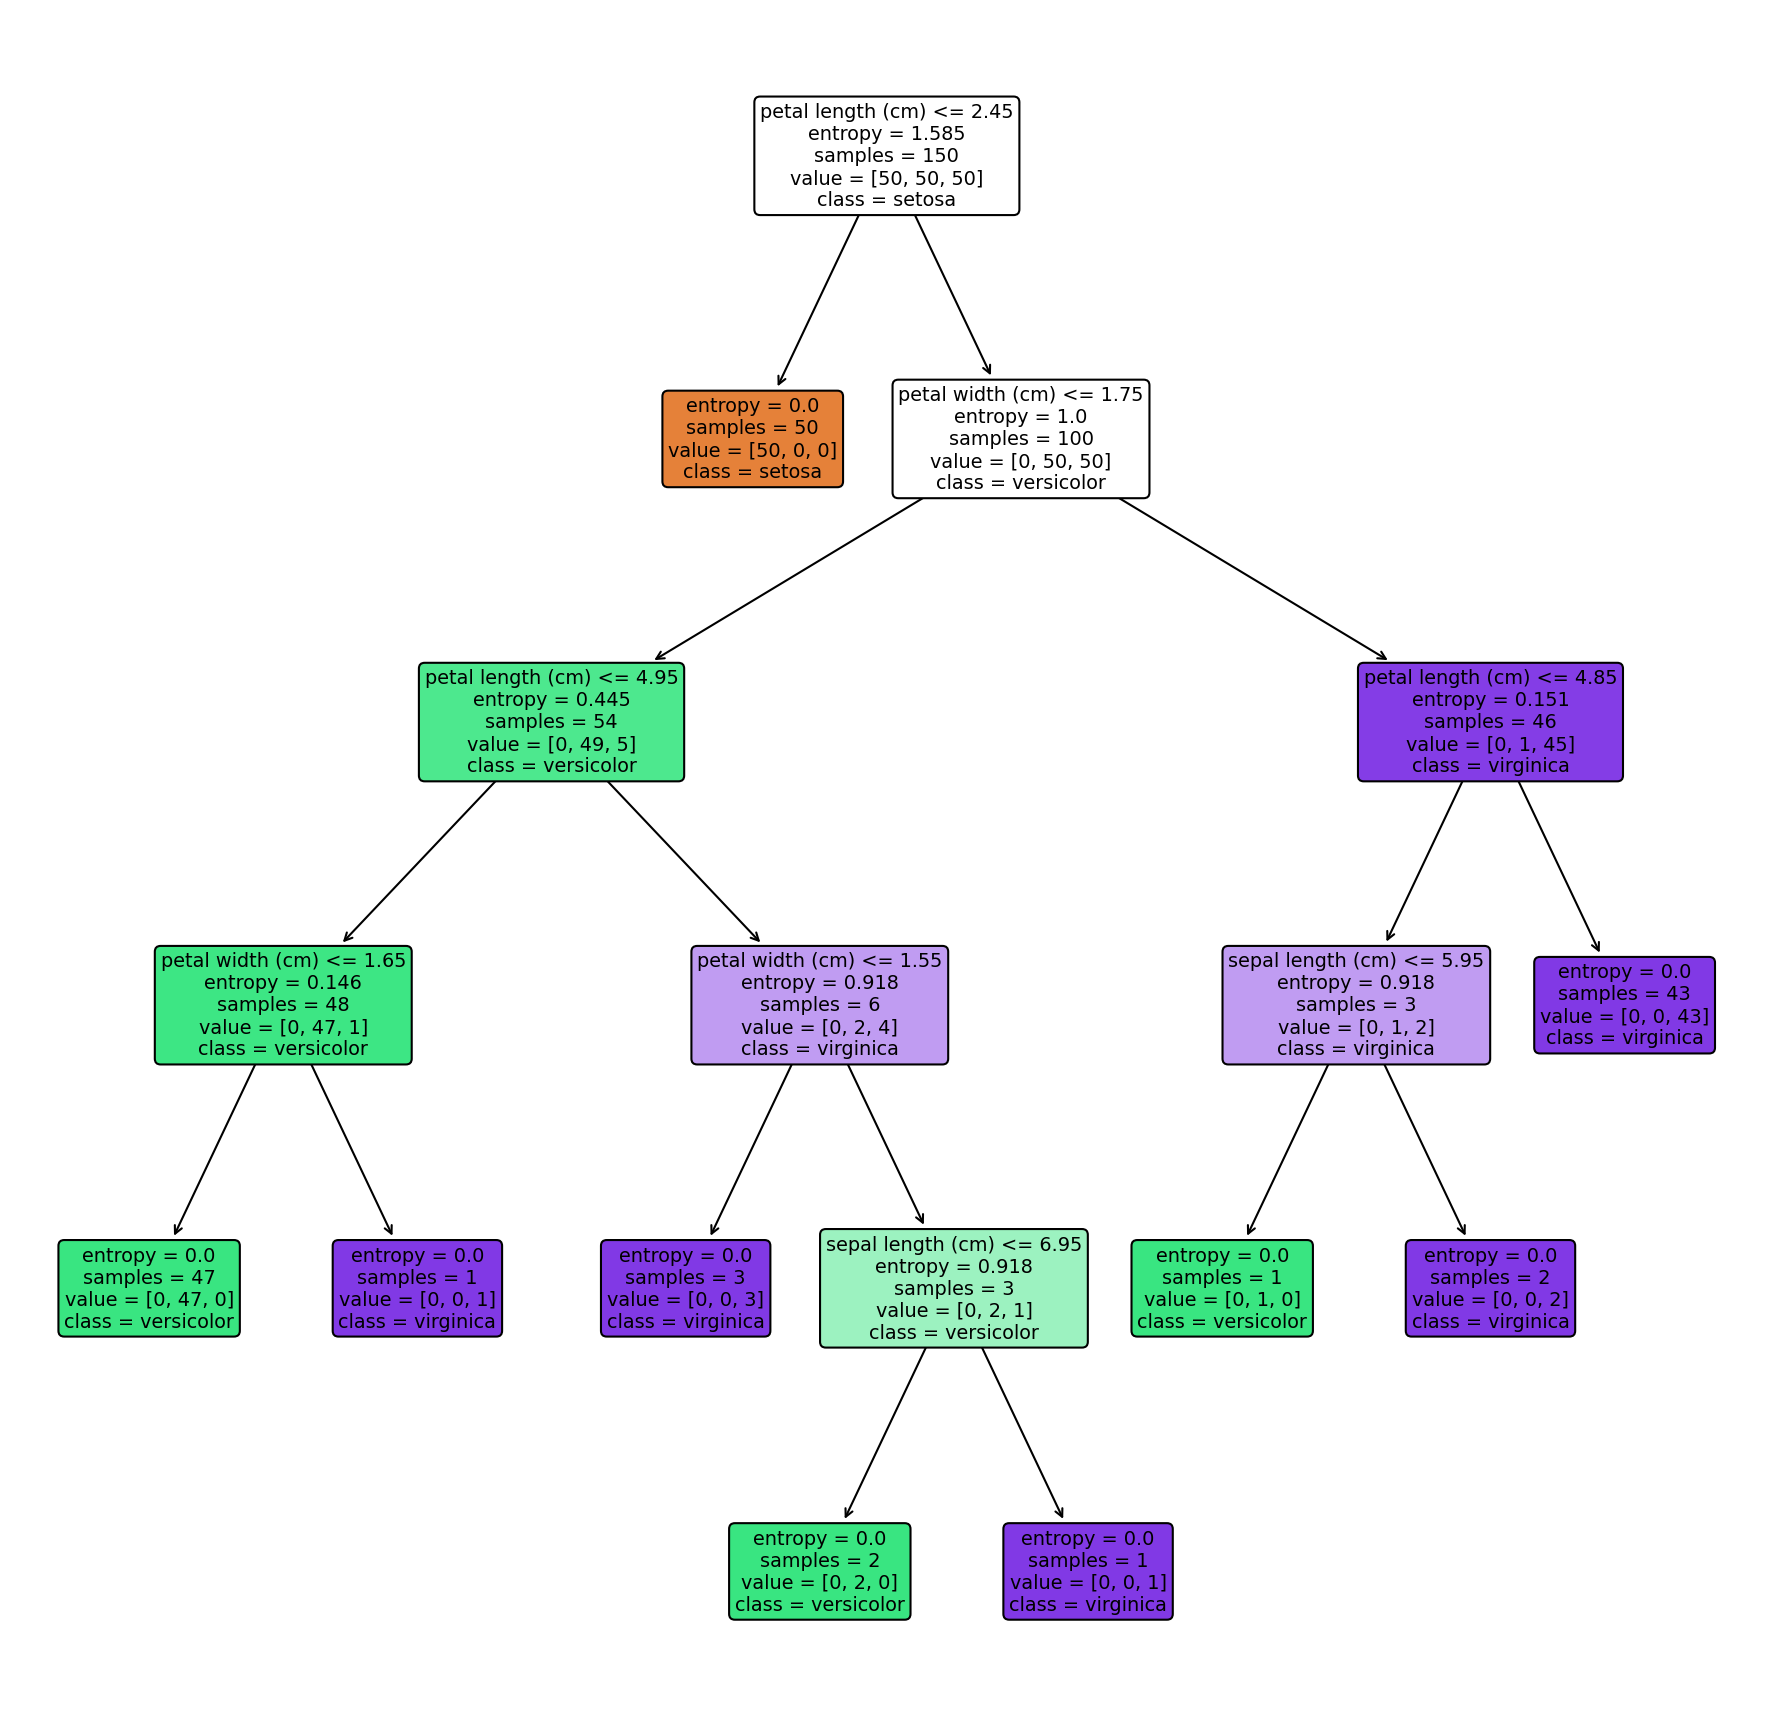

In [503]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# atur ukuran
plt.figure(figsize=(15,15), dpi=150)

# membuat visualisasi tree
plot_tree(dt_iris,
          feature_names=X_iris.columns,
          class_names=y_label,
          filled=True,
          rounded=True)
plt.show()

# left branch = True

You can also plot using `graphviz` by running `conda install -c anaconda graphviz` followed by `conda install -c anaconda python-graphviz`. Graphviz is a graph visualization tools, working with `dot` data. Visit [Graphviz Documentation Page](https://www.graphviz.org) for more information.

```
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(
    decision_tree=dtc_iris,
    out_file=None,
    feature_names=X_iris.columns,
    class_names=y_label,
    filled=True,
    rounded=True) 
graph = graphviz.Source(dot_data)
graph
```

If you want to export your tree into images or pdf, you can use Graphviz render:

```
graph.format = "png" # or "pdf"
graph.render("result/decision_tree")
```

Notice how our decision tree is useful because it produces rules that are are easy to interpret even for non-technical professionals. A reasonable decision tree model can be useful for field workers tasked to categorize type of flowers because they need only to remember one or two simple rules. 

How does a decision tree chooses which feature among the datasets to split on? In the earlier example, how does it pick Petal Length over Petal Width as its first splitting criterion?

Simplistically, we can imagine that the tree will choose to split the data in such a way that the resulting nodes will contain datapoints that contains as high proportion of a single class as possible. The degree to which this is possible is measured as "purity" and various decision tree implementations use a similar standard to achieve splits that ultimately increase homogeneity within the groups.

In [504]:
import pandas as pd

# split at root node
pd.crosstab(
    index=X_iris['petal length (cm)'] <= 2.45,
    columns=y_iris.apply(lambda x: y_label[x])
)

target             setosa  versicolor  virginica
petal length (cm)                               
False                   0          50         50
True                   50           0          0

## (Optional) Splitting Criterion: CART Algorithm

The first thing to consider in decision tree is how you split your tree. There are mainly two criterion of impurity measurement to split a tree; **Gini Index** and **Information Gain**. There's not so many differences since it's often used interchangeably.

### Gini Index

Gini index or also called gini impurity have the goals to measure how often a randomly chosen element from the set would be incorrectly labeled. 

$$
    Gini(S) = 1 - \sum^{c}_{i=1} (p_i)^2
$$

- $S$: segment of data
- $c$: number of class levels
- $p_i$: proportion of class $i$

Let's assume $c$ consists of two classes: {Positive, Negative}

**Case 1**:

In our data, the occurence of Positive is 100 and Negative is 0. Then gini result would be $1-(1+0) = 0$. The zero value of Gini impurity means the data is homogenous, and we will never incorrectly labeled Positive as Negative. 

**Case 2**:

In our data, the occurence of Positive is 50 and Negative is 50 Then gini result would be $1-(0.25+0.25) = 0.5$. This value of Gini impurity means the data is half pure.

### Information Gain

In information gain, we will use **Entropy** as a measure to split the tree. The intuition of Entropy is not so differs from Gini, but instead of using plain probability, it uses the log as well.

$$
    Entropy(S) = - \sum^{c}_{i=1} p_i\ log_{2}(p_i)
$$

- $S$: segment of data
- $c$: number of class levels
- $p_i$: proportion of class $i$

Suppose we have a segment of data with 50% Positive and 50% Negative, the entropy is:

In [505]:
import math

-0.5*math.log2(0.5) - 0.5*math.log2(0.5)

1.0

If the segment of data is 99% Positive and 1% Negative, the entropy is:

In [506]:
-0.99*math.log2(0.99) - 0.01*math.log2(0.01)

0.08079313589591118

In a binary classification case, if we have the proportion of examples in one class ($p$), we will know the proportion in the other class (1-$p$). From this we can plot the entropy for all possible values of $p$:

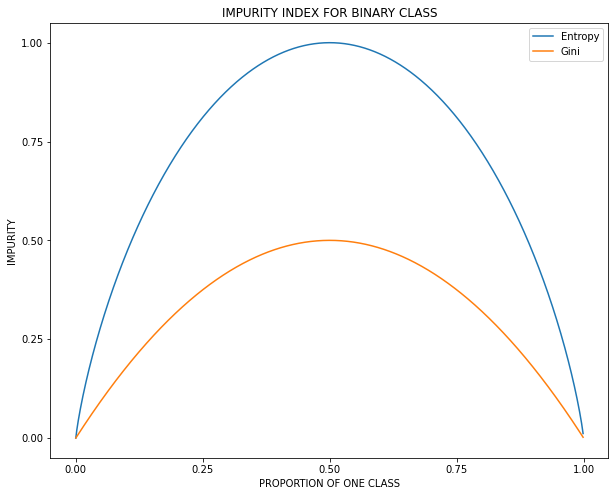

In [507]:
# FOR ILLUSTRATION PURPOSES ONLY
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
P = np.arange(0 + np.finfo(float).eps, 1, step=0.001)
plt.plot(P, -P*np.log2(P) - (1-P)*np.log2(1-P), label='Entropy')
plt.plot(P, 1 - P**2 - (1-P)**2, label='Gini')
plt.xticks(np.arange(0, 1.1, 0.25))
plt.yticks(np.arange(0, 1.1, 0.25))
plt.xlabel("PROPORTION OF ONE CLASS")
plt.ylabel("IMPURITY")
plt.title("IMPURITY INDEX FOR BINARY CLASS")
plt.legend()
plt.show()

So when our decision tree calculates the change in homogeneity resulting from a given split on each possible feature (known as **information gain**), it is calculating the difference between the entropy in the segment before ($S_1$) and after the split ($S_2$):

$$Information\ Gain(F)=Entropy(S_1)-Entropy(S_2)$$

Post-split, our data is divided into more than one partition so the calculation or $S_2$ has to consider the **weighted sum of entropy** across all of the partitions. In other words, the total entropy for $S_2$ is the sum of the entropy of each of the partitions weighted by their proportion of examples in that partition.

When dealing with numeric features, most decision tree classifications will test various splits by setting a numeric threshold and hence converting our numbers to a two-level categorical feature and allowing our information gain formula to work as usual.

**Notes:** As you noticed, there's not much difference from both measurement. However, Entropy can cost more computational processes compared to Gini since it uses logarithmic function. By default, `sklearn` use Gini to split the tree.

# Machine Learning Workflow: Decision Tree

In this section, we'll work on `promotion` dataset to predict whether the employee will be promoted or not (`is_promoted`) using Decision Tree model.

## Import Data

In [508]:
import pandas as pd
promotion = pd.read_csv("data/train.csv", index_col="employee_id")
promotion.head()

department     region         education gender  \
employee_id                                                          
65438        Sales & Marketing   region_7  Master's & above      f   
65141               Operations  region_22        Bachelor's      m   
7513         Sales & Marketing  region_19        Bachelor's      m   
2542         Sales & Marketing  region_23        Bachelor's      m   
48945               Technology  region_26        Bachelor's      m   

            recruitment_channel  no_of_trainings  age  previous_year_rating  \
employee_id                                                                   
65438                  sourcing                1   35                   5.0   
65141                     other                1   30                   5.0   
7513                   sourcing                1   34                   3.0   
2542                      other                2   39                   1.0   
48945                     other                1   45                   3.0   

             length_of_service  KPIs_met >80%  awards_won?  \
employee_id                                                  
65438                        8              1            0   
65141                        4              0            0   
7513                         7              0            0   
2542                        10              0            0   
48945                        2              0            0   

             avg_training_score  is_promoted  
employee_id                                   
65438                        49            0  
65141                        60            0  
7513                         50            0  
2542                         50            0  
48945                        73            0

We can also see the type of each columns with `info()` function. After seeing the each type of the variable, we can change the incorrect data type into the correct ones if possible.

In [509]:
promotion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 65438 to 51526
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             52399 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.9+ MB


**Variable Definition:**

- `employee_id`: Unique ID for the employee
- `department`: Department of employee
- `region`: Region of employment (unordered)
- `education`: Education Level
- `gender`: Gender of Employee
- `recruitment_channel`: Channel of recruitment for employee
- `no_of_trainings`: no of other training completed in the previous year on soft skills, technical skills, etc.
- `age`: Age of Employee
- `previous_year_rating`: Employee Rating for the previous year
- `length_of_service`: Length of service in years
- `KPIs_met >80%`: if Percent of KPIs(Key Performance Indicators) >80% then 1 else 0
- `awards_won?`: if awards won during the previous year, then 1 else 0
- `avg_training_score`: Average score in current training evaluations
- `is_promoted`: (Target) Recommended for promotion

## Data Cleaning

Is there any data type that needs to be changed?

In [510]:
cat_columns = ['education','gender','region','department','recruitment_channel','KPIs_met >80%','awards_won?','is_promoted']
promotion[cat_columns] = promotion[cat_columns].astype("category")

Detecting missing values is important before doing exploratory data analysis. We will detect if the missing values is present using this function.

In [511]:
promotion.isna().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

It turns out, there are 4124 observations in the pervious_year_rating column consist of 4124 missing values or NA. To overcome the situation, we can replace the missing value with 0. Also see that in the education variable, the category consist of 4 different categories. Bachelor’s, Below Secondary, Master’s & above and a blank category. We have to take care of the blank category since it is perhaps an important variable. For this step, we will set the blank category as NA and fill the blank with the mode.

In [512]:
promotion['previous_year_rating'] = promotion['previous_year_rating'].fillna(0)
promotion['education'] = promotion['education'].fillna(promotion['education'].mode()[0])

## Data Exploration

Before fitting model, we need to select only the features that would contribute most to the quality of the model. We can call this process as **feature selection** - the process of selecting the features that can make the predicted variable more accurate or eliminating features that are irrelevant and can decrease the model performance.

Correlation can be considered as one of many tools for feature selection, especially if the data type for the **features is continuous**. It explains the **linear relationship** between multiple variables. There are three types of correlation:

1. **Positive correlation** means that if variable A increases then variable B also increases and vice versa.

2. **Negative correlation** means that if variable A increases then variable B decreases.

3. **No correlation** no relationship between those two variables.

![](assets/correlation.png)

<AxesSubplot:>

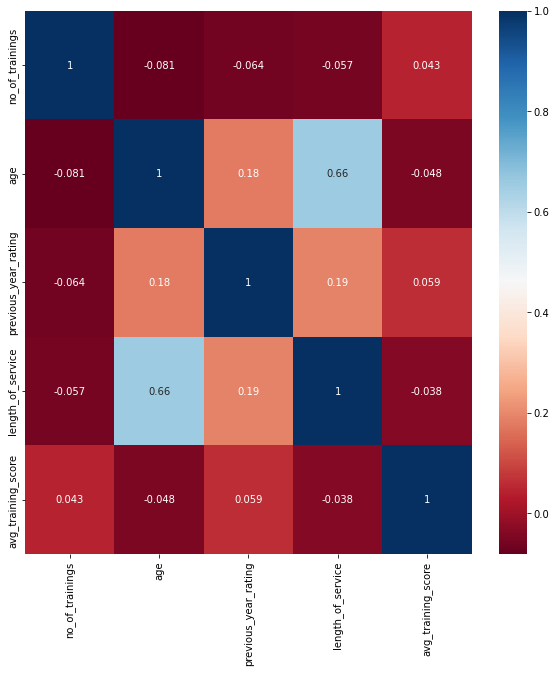

In [513]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(promotion.corr(), cmap='RdBu', annot=True)

Before we do the analysis, it is often a good idea to know the data first. An employee in the company is well-separated by their department. Let’s see which department has the most promotion.

In [514]:
pd.crosstab(index=promotion['department'],
            columns=promotion['is_promoted'])

is_promoted            0     1
department                    
Analytics           4840   512
Finance             2330   206
HR                  2282   136
Legal                986    53
Operations         10325  1023
Procurement         6450   688
R&D                  930    69
Sales & Marketing  15627  1213
Technology          6370   768

## Data Preprocessing

There are various feature selection approaches provided by `sklearn` [here](https://scikit-learn.org/stable/modules/feature_selection.html). But in this section, we manually do the feature selection according to business perspective and previous data exploration step. Here is the list of columns to be dropped:

- Too many unique values (too specific) : `region`

In [515]:
# too many unique values
promotion['region'].unique()

['region_7', 'region_22', 'region_19', 'region_23', 'region_26', ..., 'region_33', 'region_24', 'region_3', 'region_9', 'region_18']
Length: 34
Categories (34, object): ['region_1', 'region_10', 'region_11', 'region_12', ..., 'region_6', 'region_7', 'region_8', 'region_9']

In [516]:
promotion = promotion.drop(columns='region')

Next, we can split `promotion` data into features X and target y.

In [517]:
X = promotion.drop(columns='is_promoted')
y = promotion['is_promoted']

In [518]:
print(X.shape)
print(y.shape)

(54808, 11)
(54808,)


### Train-Test Splitting

Before we develop our classification model, I'll introduce you to the idea of estimating the performance of our model. Simply put, we are going to:

- Split our dataset into train and test sets  
- Build our machine learning model using data **only** from our train set  
- Obtain an unbiased measurement of the model's performance by predicting on test set

The idea of obtaining an unbiased estimate of our model's out-of-sample performance is an important one as it is often the case that the in-sample error (the error you obtain from running your algorithm on the dataset it was trained on) is optimistic and tuned / adapted in a particular way to minimize the error in the training sample. Therefore - the in-sample error is not a good representation or indication of how our model will perform when it is applied on unseen data.

In [519]:
# using 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(43846, 11)
(10962, 11)
(43846,)
(10962,)


Next, we check target proportion before and after train-test splitting to make sure the proportion is maintained.

In [520]:
# your code here: target proportion before split


In [521]:
# your code here: target proportion on training data


In [522]:
# your code here: target proportion on testing data


### One-hot Encoding
In this section, we encode categorical features as a one-hot numeric array. For illustration, let's see how we can implement one-hot encoding by using `.get_dummies()` as follows:

In [523]:
color_data = ['Red', 'Green', 'Green', 'Blue', 'Blue']
pd.get_dummies(color_data) # one hot encoding

Blue  Green  Red
0     0      0    1
1     0      1    0
2     0      1    0
3     1      0    0
4     1      0    0

In [524]:
pd.get_dummies(color_data, drop_first=True) # dummy variable (drop 1 column)

Green  Red
0      0    1
1      1    0
2      1    0
3      0    0
4      0    0

`pd.get_dummies()` provides us an easy way to perform one-hot encoding but this method is not commonly used in machine learning practice, since we typically want to transform our train and test data in the same manner.

On the other hand, `sklearn` `OneHotEncoder` might seems a lot of work, but it creates a function which persists and can then be applied to new data sets which use the same categorical variables, with consistent results. Therefore, more preferable in machine learning setting.

In [525]:
cat_cols = X.select_dtypes('category').columns
cat_cols

Index(['department', 'education', 'gender', 'recruitment_channel',
       'KPIs_met >80%', 'awards_won?'],
      dtype='object')

In [526]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)
encoder.fit(X_train[cat_cols])

OneHotEncoder(drop='first', sparse=False)

In [527]:
import warnings
warnings.filterwarnings('ignore')

X_train_encoded = pd.DataFrame(encoder.transform(X_train[cat_cols]),
                               index=X_train.index,
                               columns=encoder.get_feature_names(X_train[cat_cols].columns))
X_train_encoded.head()

department_Finance  department_HR  department_Legal  \
employee_id                                                        
7944                        0.0            0.0               0.0   
57033                       0.0            0.0               0.0   
63457                       0.0            0.0               0.0   
9931                        0.0            0.0               0.0   
11339                       0.0            0.0               0.0   

             department_Operations  department_Procurement  department_R&D  \
employee_id                                                                  
7944                           0.0                     0.0             0.0   
57033                          1.0                     0.0             0.0   
63457                          0.0                     0.0             0.0   
9931                           0.0                     0.0             0.0   
11339                          0.0                     0.0             0.0   

             department_Sales & Marketing  department_Technology  \
employee_id                                                        
7944                                  1.0                    0.0   
57033                                 0.0                    0.0   
63457                                 1.0                    0.0   
9931                                  0.0                    0.0   
11339                                 1.0                    0.0   

             education_Below Secondary  education_Master's & above  gender_m  \
employee_id                                                                    
7944                               0.0                         0.0       1.0   
57033                              0.0                         0.0       1.0   
63457                              0.0                         0.0       1.0   
9931                               0.0                         0.0       0.0   
11339                              0.0                         0.0       1.0   

             recruitment_channel_referred  recruitment_channel_sourcing  \
employee_id                                                               
7944                                  0.0                           0.0   
57033                                 0.0                           1.0   
63457                                 0.0                           0.0   
9931                                  0.0                           0.0   
11339                                 0.0                           1.0   

             KPIs_met >80%_1  awards_won?_1  
employee_id                                  
7944                     0.0            0.0  
57033                    0.0            0.0  
63457                    1.0            0.0  
9931                     0.0            0.0  
11339                    1.0            0.0

In [528]:
X_train_dummy = pd.concat([X_train.select_dtypes(exclude='category'),
                           X_train_encoded], axis=1)
X_train_dummy.head()

no_of_trainings  age  previous_year_rating  length_of_service  \
employee_id                                                                  
7944                       2   24                   1.0                  2   
57033                      1   25                   0.0                  1   
63457                      1   40                   3.0                  4   
9931                       1   28                   4.0                  5   
11339                      1   31                   4.0                  5   

             avg_training_score  department_Finance  department_HR  \
employee_id                                                          
7944                         49                 0.0            0.0   
57033                        65                 0.0            0.0   
63457                        49                 0.0            0.0   
9931                         85                 0.0            0.0   
11339                        52                 0.0            0.0   

             department_Legal  department_Operations  department_Procurement  \
employee_id                                                                    
7944                      0.0                    0.0                     0.0   
57033                     0.0                    1.0                     0.0   
63457                     0.0                    0.0                     0.0   
9931                      0.0                    0.0                     0.0   
11339                     0.0                    0.0                     0.0   

             department_R&D  department_Sales & Marketing  \
employee_id                                                 
7944                    0.0                           1.0   
57033                   0.0                           0.0   
63457                   0.0                           1.0   
9931                    0.0                           0.0   
11339                   0.0                           1.0   

             department_Technology  education_Below Secondary  \
employee_id                                                     
7944                           0.0                        0.0   
57033                          0.0                        0.0   
63457                          0.0                        0.0   
9931                           0.0                        0.0   
11339                          0.0                        0.0   

             education_Master's & above  gender_m  \
employee_id                                         
7944                                0.0       1.0   
57033                               0.0       1.0   
63457                               0.0       1.0   
9931                                0.0       0.0   
11339                               0.0       1.0   

             recruitment_channel_referred  recruitment_channel_sourcing  \
employee_id                                                               
7944                                  0.0                           0.0   
57033                                 0.0                           1.0   
63457                                 0.0                           0.0   
9931                                  0.0                           0.0   
11339                                 0.0                           1.0   

             KPIs_met >80%_1  awards_won?_1  
employee_id                                  
7944                     0.0            0.0  
57033                    0.0            0.0  
63457                    1.0            0.0  
9931                     0.0            0.0  
11339                    1.0            0.0

**Knowledge check:** Transform the testing data (`X_test`) using the same fitted `OneHotEncoder` from the training data. Save the final result into `X_test_dummy`

<!--
X_test_encoded = pd.DataFrame(encoder.transform(X_test[cat_cols]),
                               index=X_test.index,
                               columns=encoder.get_feature_names(X_test[cat_cols].columns))
X_test_dummy = pd.concat([X_test.select_dtypes(exclude='category'),
                           X_test_encoded], axis=1)
X_test_dummy.shape
-->

In [ ]:
# your code here


## Model Fitting: Decision Tree

Let's us fit our training data to `DecisionTreeClassifier` with entropy splitting criterion and depth of 2.

In [530]:
from sklearn.tree import DecisionTreeClassifier

dt_promotion = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=100)
dt_promotion.fit(X_train_dummy, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=100)

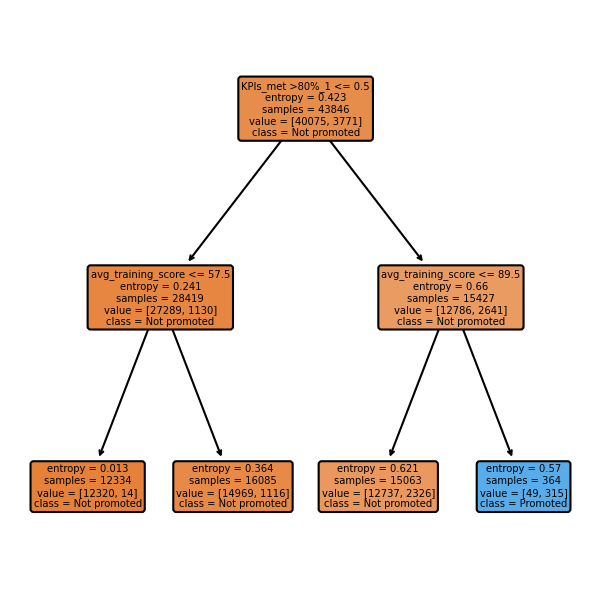

In [531]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(5,5), dpi=150)
plot_tree(dt_promotion,
          feature_names=X_train_dummy.columns,
          class_names=['Not promoted', 'Promoted'],
          # proportion=True,
          filled=True,
          rounded=True)
plt.show()

## Model Prediction

Method `.predict()` allows us to predict the label of a new set of data, given a trained (fitted) model. This method accepts only one argument (the new data) and returns the learned label for each object in the array.

In [532]:
y_pred_dt = dt_promotion.predict(X_test_dummy)
y_pred_dt

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

For classification problems, some estimators also provide `.predict_proba()` method, which returns the **probability** that a new observation has each categorical label. In this case, the label with the highest probability is returned by `.predict()` method. For binary classification, if the predicted probability is >= 0.5, then the observation is classified as a Positive class, otherwise Negative.

Note: In decision tree model, the predicted probability is represented by the class proportion on the leaf nodes.

In [533]:
y_pred_prob_dt = dt_promotion.predict_proba(X_test_dummy)
y_pred_prob_dt[:, 1]

array([0.15441811, 0.00113507, 0.06938141, ..., 0.00113507, 0.06938141,
       0.15441811])

Additionally, we can represent the prediction result into a structured DataFrame, showing the employee ID, actual label, predicted label, and predicted probability.

In [534]:
test_result_dt = pd.DataFrame({
    'ID': X_test.index,
    'actual_label': y_test.values,
    'pred_label': y_pred_dt,
    'pred_prob': y_pred_prob_dt[:, 1]
})

test_result_dt.head()

ID actual_label  pred_label  pred_prob
0  30698            0           0   0.154418
1  20798            0           0   0.001135
2  24587            0           0   0.069381
3  22150            0           0   0.001135
4  47553            0           0   0.069381

## Model Evaluation (Accuracy)

All fitted estimators in `sklearn` implement a `.score()` method. This score ranges between 0 and 1, with a larger score indicating a better fit. In classification problems, it is equivalent to an accuracy score. Accuracy is the proportion of correctly identified cases from all cases. It is a common practice to compare the performance of a model on training as well as on testing data.

In [535]:
# train accuracy
dt_promotion.score(X_train_dummy, y_train)

0.9200611230214842

In [536]:
# test accuracy
dt_promotion.score(X_test_dummy, y_test)

0.9233716475095786

Sometimes, you'll also find machine learning applications that uses the notion of a baseline measure in their model evaluation phase. The baseline performance is used to quantify the improvement of an applied solution to the problem and a **base rate** is just the accuracy of trivially predicting the most-frequent (or majority) class. Let's take a look back on our target class proportion:

In [537]:
y.value_counts(normalize=True)

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

So, by naively predicting all observations to Negative class we can easily achieve 91.48% accuracy. We have our initial Decision Tree model with a 92% accuracy on both training and testing data. This does not tells us whether the model specification is optimal, so try and pause here and ask - what are some things we can try in obtaining a better model performance? Think of some strategy and list them down before scrolling further:

<!--
Problems to be addressed:

1. In terms of metrics selection, accuracy is misleading to be used on imbalanced data. The solution is to use another representative metric.
2. In terms of imbalanced data, we can apply several techniques to make sure the class proportion is balanced.
-->

In [538]:
# your answer


> The importance to evaluate your model in light of the question, "can my model be further improved upon?"

## Consideration on Decision Tree

The decision tree models we've created offered a great deal of advantage in terms of its ease of interpretation. However, a decision tree is also a **greedy algorithm** in the way it picks an attribute at every step of the model construction. Because the tree is built in a top-down fashion, it picks an attribute that result in the highest information gain, a strategy that while converge to local optima does not guarantee global optimality. Some effort to reducing the greedy effect of local-optimality has been introduced (k-steps look-ahead trees, by considering more than a single attribute at some of the construction stages; dual information distance (DID) as splitting criterion). Reference: [Efficient Construction of Decision Trees by the Dual Information Distance Method](http://www.eng.tau.ac.il/~bengal/DID.pdf)

Decision Trees can be **non-robust** as their model is very sensitive to the training data it is trained on: changes in training data can result in rather drastic changes to the tree.

Decision trees are also famous for being prone to **overfitting**. In `sklearn`, the hyperparameters is by default growing an overly complex tree. To make this more concrete, I'm going to implement the same decision tree algorithm but using its default:

- `max_depth=None`: Nodes are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples.
- `min_samples_split=2`: The minimum number of samples required to split an internal node is 2.
- `min_samples_leaf=1`: The minimum number of samples required to be at a leaf node is 1.

In [539]:
dt_complex = DecisionTreeClassifier(
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=100)
dt_complex.fit(X_train_dummy, y_train)

DecisionTreeClassifier(random_state=100)

By growing a complex tree model, we can easily obtain a ~99% in-sample accuracy, which is meaningless and potentially misleading:

In [540]:
# train accuracy
dt_complex.score(X_train_dummy, y_train)

0.9968070063403731

In [541]:
# test accuracy
dt_complex.score(X_test_dummy, y_test)

0.8986498814085021

In [542]:
# the depth of tree after fitted into training data
dt_complex.tree_.max_depth

36

In [543]:
# overly complex tree
overfit_rules = export_text(
    decision_tree=dt_complex,
    feature_names=X_train_dummy.columns.to_list())
print(overfit_rules[:1000])

|--- avg_training_score <= 90.50
|   |--- KPIs_met >80%_1 <= 0.50
|   |   |--- awards_won?_1 <= 0.50
|   |   |   |--- previous_year_rating <= 4.50
|   |   |   |   |--- avg_training_score <= 59.50
|   |   |   |   |   |--- avg_training_score <= 56.50
|   |   |   |   |   |   |--- avg_training_score <= 54.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- avg_training_score >  54.50
|   |   |   |   |   |   |   |--- department_Sales & Marketing <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- department_Sales & Marketing >  0.50
|   |   |   |   |   |   |   |   |--- previous_year_rating <= 2.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- previous_year_rating >  2.50
|   |   |   |   |   |   |   |   |   |--- length_of_service <= 2.50
|   |   |   |   |   |   |   |   |   |   |--- avg_training_score <= 55.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   | 

Another way to think about this problem is that our training data has two components to it: signal and noise. The goal of machine learning is to identify the signal but be robust enough to avoid modeling the "noise" component of the data. When we build a model, we want to know that our model is not overly adapted to the data set to the point that it captures both the signal and noise, a phenomenon known as "overfitting". When our model is guilty of overfitting, the in-sample accuracy will be very high (in some cases ~100%) but fail to perform on unseen data. The idea is to strike the **right balance** between accuracy (don't underfit) and robustness to noise (don't overfit).

![](assets/underfitting_overfitting.png)

One of many possible solution to address the overfitting problem is to make the model simpler by tuning its hyperparameters. This process of tuning is often called as **regularization**. We'll dive deep into this section later.

One other weakness in a decision tree is that all **predictor terms are by nature assumed to interact**. Intuitively, to predict a label of an observation: the predictor in the internal node have to combine with the one node above it, which in turn have to combine with the predictor even further up the tree (root node for example). This rule-based system can be too rigid for some cases of machine learning tasks.

On its own however, decision trees is quite **robust to the the problem of multicollinearity**. Imagine predictor A and predictor B both explain the effect of the target variable. A decision tree, being a greedy algorithm, will choose the one that has the highest information gain in one split, whereas a method such as logistic regression would have used both.

Finally, another important trait of decision tree is that it is **robust and insensitive to outliers**. Intuitively, imagine a measurement of height with values: 167, 170, 161, 176, 158, and 213 in cm. A decision tree's splitting criterion is going to be at a point that greedily maximizes the homogeneity within the resulting groups (the purer the better) and it is not hard to reason that, mathematically, a split at say height=168 would lead to that objective much more consistently that a split at say 200cm (thus separating only that one observation in its daughter nodes). Similarly, if there is a data entry error and you have one observation with height of 400cm, the tree's "purity objective" is still going to offset the outlier's influence.

# Modeling Improvement

In this section, we would like to address some of the problems we faced before:

- In terms of metrics selection, accuracy is a misleading metric to be used on imbalanced data. The solution is to use more representative metric.
- In terms of imbalanced data, we can apply several techniques to make sure the class proportion is somewhat balanced.
- In terms of overfitting, we can search for a sub-optimal hyperparameters to improve the model performance on train and test data.

## Model Evaluation for Classification

Previously, we only consider the training and testing accuracy using `.score()` method. Let's take a look into other evaluation metrics for classification model:

### Confusion Matrix

Confusion matrix is a special kind of frequency table, with two dimensions ("actual" and "predicted") and identical sets of target classes in both dimensions. The name stems from the fact that it makes it easy to see whether the system is confusing two classes (i.e. commonly mislabeling one as another).

In binary classification, the confusion matrix is a table with two rows and two columns that reports the number of:
- True Positive (TP): positive class being correctly classified
- True Negative (TN): negative class being correctly classified
- False Positive (FP): negative class being misclassified as positive
- False Negative (FN): positive class being misclassified as negative
    


In [544]:
# training confusion matrix

y_pred_train = dt_promotion.predict(X_train_dummy)

pd.crosstab(
    index=y_pred_train,
    columns=y_train,
    rownames=['Predicted'],
    colnames=['Actual'],
    margins=True
)

Actual         0     1    All
Predicted                    
0          40026  3456  43482
1             49   315    364
All        40075  3771  43846

### Metrics

From the confusion matrix above, we can formulate these evaluation metrics to be optimized during model improvement:

In [545]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

Accuracy is the proportion of correctly identified cases (TP and TN) from all cases. It is the most commonly used metrics in classification, but can be misleading (as discussed in the previous section). When predicting positives and negatives is equally important, and both classes are balanced equally, accuracy can still be useful.

$$Accuracy=\frac{TP+TN}{TP+TN+FP+FN}$$

In [546]:
# training accuracy
accuracy_score(y_true=y_train, y_pred=y_pred_train)

0.9200611230214842

Precision is the proportion of correctly classified positive predictions. It is also called as positive predictive value (PPV). Precision score will be higher if the False Positive is minimized.

$$Precision=\frac{TP}{TP+FP}$$

> Said another way, “for all instances classified positive, what percent was correct?”

In [547]:
# training precision
precision_score(y_true=y_train, y_pred=y_pred_train, pos_label=1)

0.8653846153846154

Recall is the proportion of positives that are correctly identified. It is also called as Sensitivity or True Positive Rate (TPR). Recall score will be higher if the False Negative is minimized.

$$Recall=\frac{TP}{TP+FN}$$

> Said another way, “for all instances that were actually positive, what percent was classified correctly?”

In [548]:
# training recall
recall_score(y_true=y_train, y_pred=y_pred_train, pos_label=1)

0.08353221957040573

F1 score is the harmonic mean of precision and recall. The harmonic mean is used instead of a simple average because it punishes extreme values. Example: a classifier with precision of 1.0 and recall of 0.0 has a simple average of 0.5 but an F1 score of 0.

$$F_1=\dfrac{2}{\frac{1}{Precision}+\frac{1}{Recall}}$$

Alternatively,

$$F_1 = \dfrac{2\times Precision\times Recall}{Precision+Recall}$$

In [549]:
# training F1 score
f1_score(y_true=y_train, y_pred=y_pred_train, pos_label=1)

0.15235792019347036

Instead of printing out the metrics one-by-one, we are going to use `classification_report()` provided from `sklearn.metrics` to inspect the performance of a model. Additional information:

- `support`: the number of actual occurrences of the class in the specified dataset
- `macro avg`: simple average
- `weighted avg`: weighted average based on `support`

In [550]:
# training performance
print(classification_report(
    y_true=y_train,
    y_pred=dt_promotion.predict(X_train_dummy),
    target_names=['Not Promoted', 'Promoted'],
    digits=5))

              precision    recall  f1-score   support

Not Promoted    0.92052   0.99878   0.95805     40075
    Promoted    0.86538   0.08353   0.15236      3771

    accuracy                        0.92006     43846
   macro avg    0.89295   0.54115   0.55521     43846
weighted avg    0.91578   0.92006   0.88876     43846



**Knowledge check:**

- From the definition of Precision and Recall above, if you have to choose one of them, which metric do you think is suitable for the following cases:
    - Email spam classifier (class: Spam or Ham)
    - COVID-19 rapid test (class: Positive or Negative)
    - Customer churn prediction (class: Churn or Stay)
    - Overdue prediction of loan repayment (class: Overdue or Not Overdue)

- Compare the performance of `dt_promotion` on training and testing data using confusion matrix and `classification_report()`. What can be concluded from the output?

In [551]:
# your code here


### Precision-Recall Tradeoff

False negatives and false positives are rarely equally costly to a business (or really, to any domain). For an insurance company, a false negative on an insurance payout is likely to cost the company more than a false positive for example. Finding the right precision-recall tradeoff comes with domain expertise - and let's make all of these more concrete via visualization:

<AxesSubplot:xlabel='Threshold'>

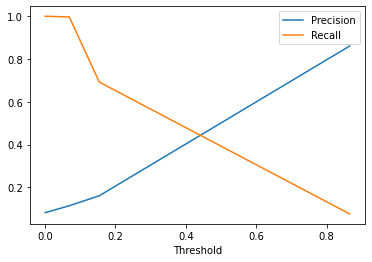

In [552]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(
    y_true=y_test,
    probas_pred=dt_promotion.predict_proba(X_test_dummy)[:,1])

pd.DataFrame({
    'Threshold': thresholds,
    'Precision': precision[:-1],
    'Recall': recall[:-1]
}).set_index('Threshold').plot()

To improve a model, we can perform threshold tuning to achieve desirable precision-recall values. Keep in mind:

- Shifting the threshold closer to 0 will increase recall
- Shifting the threshold closer to 1 will increase precision

### Receiver Operating Characteristics (ROC)

The ROC curve is a graphical representation of the True Positive Rate (Sensitivity) and False Positive Rate (1-Specificity) pair corresponding to each particular decision threshold. A good model should ideally have a **high True Positive Rate** and a **low False Positive Rate**. Note: Specificity is the True Negative Rate.

![](assets/roc_animation.gif)

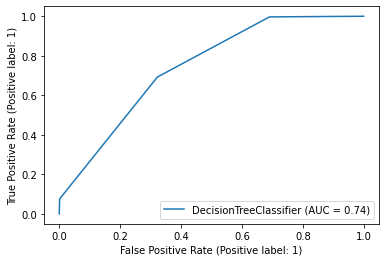

In [553]:
from sklearn.metrics import plot_roc_curve, roc_auc_score

plot_roc_curve(
    estimator=dt_promotion,
    X=X_test_dummy,
    y=y_test)

The AUC shows the area under the ROC curve. The closer to 1, the better the model performance in separating predicted probability of positive and negative classes.

In [554]:
roc_auc_score(
    y_true=y_test,
    y_score=dt_promotion.predict_proba(X_test_dummy)[:,1])

0.7433963518069007

Optionally, we can inspect the probability distribution of our classifier by using histogram or density plot.

In [555]:
test_result_dt.head()

ID actual_label  pred_label  pred_prob
0  30698            0           0   0.154418
1  20798            0           0   0.001135
2  24587            0           0   0.069381
3  22150            0           0   0.001135
4  47553            0           0   0.069381

actual_label
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: pred_prob, dtype: object

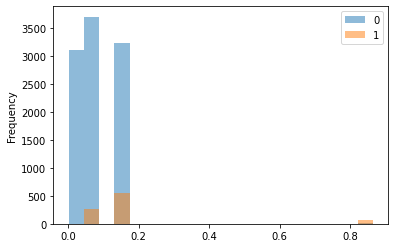

In [556]:
test_result_dt.groupby('actual_label')['pred_prob'].plot(kind='hist', bins=20, alpha=0.5, legend=True)

## Sampling

Most of real world data have imbalance class problem, including our case. There are several sampling techniques we can apply, the two most common are:

![](assets/sampling.png)

- **Downsampling**: reduce majority class observations to balance with minority class. Disadvantage: discarding potentially useful information. Often used when there are a lot of data on the minority class.
- **Oversampling**: adding minority class observations to balance with majority class, by duplicating data. Disadvantage: only duplicate data, does not add new information.

In [557]:
y_train.value_counts()

0    40075
1     3771
Name: is_promoted, dtype: int64

We are going to use oversampling technique, since there is very little data in the minority class. The `imblearn` package has made it easier for us to perform various kinds of sampling techniques. Make sure to run `pip install -U imbalanced-learn` in your prompt.

Documentation of `imblearn`: [API Reference](https://imbalanced-learn.org/stable/references/index.html)

**Important Note:** Only perform sampling on training data, since we treat testing data as unseen data.

In [558]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=100)
X_train_up, y_train_up = oversampler.fit_resample(X_train_dummy, y_train)
y_train_up.value_counts()

0    40075
1    40075
Name: is_promoted, dtype: int64

Additionally, we can provide sampling information to resample the data by using parameter `sampling_strategy`. Suppose we don't want the resample result to be precise in the ratio of 50:50, let's say the desired ratio of minority:majority is 30:70 then we can set `sampling_strategy=30/70`. 

In [559]:
dt_promotion_up = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=100)
dt_promotion_up.fit(X_train_up, y_train_up)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=100)

**Knowledge check:** Compare the performance of our model before and after oversampling, but with the same hyperparameter settings.

In [560]:
# your code here


Code reference for undersampling:

```
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=123)
X_train_down, y_train_down = undersampler.fit_resample(X_train_dummy, y_train)
```

## Regularization

After solving the split problem, the decision tree has one other problem to solve: it needs to know when to stop growing. If the tree grow indefinitely (and it can) it will end up splitting all data points until they are perfectly classified and yield an overly specific model (overfitting; or the case of high variance and low bias).

Regularization is a technique which makes slight modifications to the learning algorithm such that the model generalizes better. In tree-based model, the regularization often called as **pruning**.

One approach is to set a pre-determined number of levels upon which we command our tree to stop growing. This is an approach known as **pre-pruning**, but it has the obvious downside of us having to make an informed guess around the optimal depth / size of the tree.

The alternative, **post-pruning** relies on a strategy that grow the tree to too large a size and then pruning it later on once all important structures and classification patterns were discovered. Getting the best fit decision tree model means we manage to strike a good balance with our bias-variance and precision-recall tradeoffs. Reference: [Cost Complexity Pruning](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html)

Documentation of [`sklearn` `DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

> Rule-of-thumb: Increasing `min_*` or decreasing `max_*` hyperparameters will result in simpler tree model.

In [561]:
dt_reg = DecisionTreeClassifier(
    max_depth=40,
    min_samples_split=10,
    min_samples_leaf=5,
    max_leaf_nodes=None,
    max_features='auto',
    random_state=123)
dt_reg.fit(X_train_dummy, y_train)

DecisionTreeClassifier(max_depth=40, max_features='auto', min_samples_leaf=5,
                       min_samples_split=10, random_state=123)

In [562]:
# training performance
print(classification_report(
    y_true=y_train,
    y_pred=dt_reg.predict(X_train_dummy),
    target_names=['Not Promoted', 'Promoted'],
    digits=5))

# testing performance
print(classification_report(
    y_true=y_test,
    y_pred=dt_reg.predict(X_test_dummy),
    target_names=['Not Promoted', 'Promoted'],
    digits=5))

              precision    recall  f1-score   support

Not Promoted    0.94148   0.99366   0.96687     40075
    Promoted    0.83613   0.34368   0.48713      3771

    accuracy                        0.93776     43846
   macro avg    0.88881   0.66867   0.72700     43846
weighted avg    0.93242   0.93776   0.92561     43846

              precision    recall  f1-score   support

Not Promoted    0.94014   0.99086   0.96483     10065
    Promoted    0.74011   0.29208   0.41886       897

    accuracy                        0.93368     10962
   macro avg    0.84013   0.64147   0.69185     10962
weighted avg    0.92377   0.93368   0.92016     10962



## k-fold Cross Validation

One interesting and highly useful technique to evaluate predictive models is called the k-fold Cross Validation. What it does is partition our original dataset into $k$ equal-sized samples (say we call them 'bins'). Of these smaller bins, a single one of them is used as the test set and the remaining $k-1$ bins used as training data. This process is repeated for $k$ times (the folds) so each bin is used exactly once as the test set. The obvious benefit of this technique is that all observations are used as both training and test sets.

![](assets/kfold_cv.png)

**Note:** If you have performed train-test splitting before, the "test" set used in the cross validation is often called as **validation** set.

In [563]:
from sklearn.model_selection import cross_validate

dt_5_fold = cross_validate(
    estimator=dt_reg,
    X=X_train_dummy,
    y=y_train,
    scoring='recall',
    cv=5,
    return_train_score=True)
dt_5_fold

{'fit_time': array([0.06981444, 0.0787909 , 0.05386376, 0.05437136, 0.06083941]),
 'score_time': array([0.01396155, 0.01794815, 0.00997567, 0.00797606, 0.01096702]),
 'test_score': array([0.25430464, 0.22679045, 0.29973475, 0.25464191, 0.22015915]),
 'train_score': array([0.31564987, 0.29466357, 0.35797149, 0.32383162, 0.30527014])}

In [564]:
# Average recall on validation set
np.mean(dt_5_fold['test_score'])

0.25112617914170776

## Hyperparameter Search

To tune, is by mean, do a search in order to find the value wich resulting in best performance of our models. There are lots of optimization field of study (especially in continuous space problem) like [Swarm Intelligence](https://en.wikipedia.org/wiki/Swarm_intelligence), [Evolutionary Computation](https://en.wikipedia.org/wiki/Evolutionary_computation), etc to do this job. We will not focus on the algorithm, so let's just inspect and do a exhaustive search, Grid Search!

### Grid Search

The grid search provided by `GridSearchCV` exhaustively generates candidates from a grid of parameter values specified with the `param_grid` parameter.

In [565]:
from sklearn.model_selection import GridSearchCV

# hyperparameter combinations
param_grid_dt = {
    'max_depth': range(20, 40, 5),
    'min_samples_split': range(30, 40, 2),
    'min_samples_leaf': range(2, 15, 2),
    'max_features': ['sqrt', 'log2', None]
    }

# FOR ILLUSTRATION PURPOSES ONLY
from sklearn.model_selection import ParameterGrid
len(list(ParameterGrid(param_grid_dt))) # number of combinations

420

In [566]:
# model fitting
dt_grid_up = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=123),
    param_grid=param_grid_dt,
    scoring='recall',
    n_jobs=-1,
    cv=3,
    verbose=3)

#dt_grid_up.fit(X_train_up, y_train_up)

Fitting 3 folds for each of 420 candidates, totalling 1260 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'max_depth': range(20, 40, 5),
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': range(2, 15, 2),
                         'min_samples_split': range(30, 40, 2)},
             scoring='recall', verbose=3)

In [567]:
# saving model
import pickle

#pickle.dump(dt_grid_up.best_estimator_, open("model/dt_grid_up.pkl", "wb"))

In [568]:
dt_grid_up = pickle.load(open('model/dt_grid_up.pkl','rb'))

Let's evaluate the results of `GridSearchCV` on `DecisionTreeClassifier`:

In [569]:
# best model
dt_grid_up

DecisionTreeClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=30,
                       random_state=123)

### Randomized Search

`RandomizedSearchCV` implements a randomized search over parameters, where each setting is sampled from a distribution over possible parameter values. This has two main benefits over an exhaustive search:

- A budget can be chosen independent of the number of parameters and possible values.
- Adding parameters that do not influence the performance does not decrease efficiency.

Specifying how parameters should be sampled is done using a dictionary, very similar to specifying parameters for `GridSearchCV`. Additionally, a computation budget, being the number of sampled candidates or sampling iterations, is specified using the `n_iter` parameter.

In [570]:
from sklearn.model_selection import RandomizedSearchCV

# hyperparameter distributions
param_random_dt = {
    'max_depth': range(10, 100),
    'min_samples_split': range(2, 100),
    'min_samples_leaf': range(2, 100),
    'max_features': list(range(20, 30)) + ['sqrt', 'log2', None]
    }

In [571]:
# model fitting
dt_random_up = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=123),
    param_distributions=param_random_dt,
    n_iter=4,
    scoring='recall',
    cv=3,
    verbose=3,
    random_state=123)

#dt_random_up.fit(X_train_up, y_train_up)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END max_depth=49, max_features=sqrt, min_samples_leaf=29, min_samples_split=22;, score=0.848 total time=   0.0s
[CV 2/3] END max_depth=49, max_features=sqrt, min_samples_leaf=29, min_samples_split=22;, score=0.892 total time=   0.0s
[CV 3/3] END max_depth=49, max_features=sqrt, min_samples_leaf=29, min_samples_split=22;, score=0.864 total time=   0.0s
[CV 1/3] END max_depth=79, max_features=25, min_samples_leaf=39, min_samples_split=45;, score=0.888 total time=   0.1s
[CV 2/3] END max_depth=79, max_features=25, min_samples_leaf=39, min_samples_split=45;, score=0.893 total time=   0.1s
[CV 3/3] END max_depth=79, max_features=25, min_samples_leaf=39, min_samples_split=45;, score=0.897 total time=   0.2s
[CV 1/3] END max_depth=43, max_features=sqrt, min_samples_leaf=65, min_samples_split=6;, score=0.843 total time=   0.0s
[CV 2/3] END max_depth=43, max_features=sqrt, min_samples_leaf=65, min_samples_split=6;, score=0.822

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=123),
                   n_iter=4,
                   param_distributions={'max_depth': range(10, 100),
                                        'max_features': [20, 21, 22, 23, 24, 25,
                                                         26, 27, 28, 29, 'sqrt',
                                                         'log2', None],
                                        'min_samples_leaf': range(2, 100),
                                        'min_samples_split': range(2, 100)},
                   random_state=123, scoring='recall', verbose=3)

In [572]:
#pickle.dump(dt_random_up.best_estimator_, open("model/dt_random_up.pkl", "wb"))
dt_random_up = pickle.load(open('model/dt_random_up.pkl','rb'))

In [573]:
# best model
dt_random_up

DecisionTreeClassifier(max_depth=19, min_samples_leaf=23, min_samples_split=80,
                       random_state=123)

In [574]:
# model evaluation



# Ensemble Methods

Ensemble method is a learning method that combines predictions from several machine learning models into 1 single prediction. The idea of ensembling is largely in principle and doesn't necessarily reference any particular algorithm. They describe any meta-algorithms that combine several machine learning techniques into one predictive model in order to decrease variance, reduce bias, or improve predictions.

## Wisdom of the Crowd

Wisdom of the Crowd is the collective knowledge of a group of people as expressed through their aggregated actions or opinions, regarded as an alternative to specialist or expert knowledge.

**OPTIONAL: Mathematical Point-of-View**

Suppose we create 3 different machine learning models to make a single prediction of whether a customer is classified as default or not. Obtained the following performance:

1. Logistic Regression: 70% correct
2. k-Nearest Neighbor: 70% correct
3. Decision Tree: 70% correct

In the case of classification, majority voting will be used to combine the predicted results. In this case, it means that at least 2 models are sufficient to be correct in order for them to be collectively correct.

In [575]:
# probability all three models are correct = 0.7 * 0.7 * 0.7

# probability of at least two models being correct and one model wrong
# three combinations of correct models: 1&2, 1&3, 2&3
# 3 * 0.7 * 0.7 * (1 - 0.7)

0.7 * 0.7 * 0.7 + 3 * 0.7 * 0.7 * (1 - 0.7)

0.7839999999999999

It turns out that the model performance is **collectively** better than each model. This idea underlies the concept of the ensemble method.

## Types of Ensemble Methods

### Bagging

Stands for Bootstrap Aggregating. Bootstrapping is resampling data with the same cardinality from the dataset, that could help reducing the model's variance. How bootstrapping could reduce the variance? Well, by splitting our data into several small samples and feed them into homogenous classifier, we would likely to create less-overfitted models. With less overfit means, is, a lower variance.

![](assets/bagging.jpeg)

Source: [Medium](https://medium.com/@rrfd/boosting-bagging-and-stacking-ensemble-methods-with-sklearn-and-mlens-a455c0c982de)

This method is effective if you're working with limited data, since the resample methods allows you to estimeate the score by aggregating them (the classifiers's result). 

### Boosting

The main idea of boosting is to make a "teamwork" between models. Unlike Bagging where each model runs independently and then aggregated at the end, Boosting will add the models **sequentially**, one after another. A new base-learner model will be trained from the error of previous model, hence it will boost the knowledge of the whole model gradually. 

![](assets/bagging_boosting.png)

### Stacking

The previous two ensemble methods, bagging and boosting uses the same model learner. If it's decision tree, then all the learner are decision tree. Unlike both of them, stacking usually uses **different learner** to train. The other difference is stacking creates a meta-model as it's final model to predict the output. Unlike bagging where each models generates outputs, and then followed by aggregating the output (usually by average), stacking will create a **meta-model** (usually a neural network) on the last process to model the output of model learner (some people call it base learner).

![](assets/stacking.png)

# Random Forest

## Concept

Random forest is an example of bagging method. The **forest** means a bunch of decision trees (it's homogen). The **random** means there are several randomness in the model that makes this model can perform well. Two randomness of random forests are:

- Each tree is build from subsets of training sample through random sampling (with replacement)
- At each tree node, a subset of feature are randomly selected to generate the best split (rather than using all features)

In the case of classification, our forest then classify the new example through that voting mechanism while in the case of regression it simply takes the average of output.

![](assets/random_forest.png)

Among many of its advantages, random forest can be used to solve for both regression and classification tasks, handles extremely large datasets well (since the ensemble approach means it only use a small sampled subset from the full dataset), would solve for the dimensionality problems through implicit feature selection while treating noisy data (missing values and outlier values) out of the box.

## Basic Implementation

Let's us fit our training data to `RandomForestClassifier` with default parameters. By default it uses 100 trees.

In [576]:
from sklearn.ensemble import RandomForestClassifier

rf_promotion = RandomForestClassifier(random_state=100, oob_score=True)
rf_promotion.fit(X_train_dummy, y_train)

RandomForestClassifier(oob_score=True, random_state=100)

In [577]:
#pickle.dump(rf_promotion, open("model/rf_promotion.pkl", "wb"))

In [578]:
# loading model
rf_promotion = pickle.load(open('model/rf_promotion.pkl','rb'))

### Out-of-Bag Score

In practice, the random forest already have out-of-bag estimates (OOB) that can be used as a reliable estimate of its true accuracy on unseen examples. Specifically, for each tree that our random forest constructs, any example not selected to train the decision model is used to test the tree’s performance on unseen data. Then, for each observation in our dataset, our random forest count the votes to determine the final predicted class. This total error rate is the out-of-bag error rate.

In [579]:
rf_promotion.oob_score_

0.933198011221092

We can also print out the computed out-of-bag decision function on the training set. If `n_estimators` is small it might be possible that a data point was never left out during the bootstrap. In this case, `oob_decision_function_` might contain `NaN`.

In [580]:
rf_promotion.oob_decision_function_

array([[1.        , 0.        ],
       [0.97674419, 0.02325581],
       [0.89473684, 0.10526316],
       ...,
       [0.9       , 0.1       ],
       [1.        , 0.        ],
       [1.        , 0.        ]])

Note that both `oob_score_` and `oob_decision_function_` exists only when `oob_score` is `True`.

Now, let's check perfomance in data train:

In [581]:
# training performance
print(classification_report(
    y_true=y_train,
    y_pred=rf_promotion.predict(X_train_dummy),
    target_names=['Not Promoted', 'Promoted'],
    digits=5))

              precision    recall  f1-score   support

Not Promoted    0.99696   0.99945   0.99821     40075
    Promoted    0.99401   0.96765   0.98065      3771

    accuracy                        0.99672     43846
   macro avg    0.99549   0.98355   0.98943     43846
weighted avg    0.99671   0.99672   0.99670     43846



From the results of the evaluation above, we can see that the value for all evaluation metrics is nearly perfect. This result should be suspicious considering that machine learning model is unlikely to produce errors. Now, let's check preformance in data test:

In [582]:
# testing performance
print(classification_report(
    y_true=y_test,
    y_pred=rf_promotion.predict(X_test_dummy),
    target_names=['Not Promoted', 'Promoted'],
    digits=5))

              precision    recall  f1-score   support

Not Promoted    0.94544   0.98818   0.96633     10065
    Promoted    0.73077   0.36009   0.48245       897

    accuracy                        0.93678     10962
   macro avg    0.83810   0.67413   0.72439     10962
weighted avg    0.92787   0.93678   0.92674     10962



As we assumed before, results evaluation of model in test data is significantly different for recall value in the positive class. This means that the overfit estimation in `model_rf_ori` is correct. 

In [583]:
from sklearn.model_selection import cross_val_score

rf_no_oob = RandomForestClassifier(random_state=100) # will run faster than oob_score=True
cross_val_score(rf_no_oob, X_train_dummy, y_train, cv=3, scoring='recall')

array([0.33412888, 0.35322196, 0.3381066 ])

In [584]:
# get roc/auc score
roc_auc_score(
    y_true=y_test,
    y_score=rf_promotion.predict_proba(X_test_dummy)[:,1])

0.8741074875073449

### Feature Importances

We can inspect `feature_importances_` attribute from the fitted random forest to get a list of the most important variables used in the model. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature across `n_estimators` trees. It is also known as the Gini importance.

Warning: impurity-based feature importances can be misleading for high cardinality features (many unique values). See `sklearn.inspection.permutation_importance` as an alternative.

<AxesSubplot:title={'center':'Top 10 Feature Importances'}>

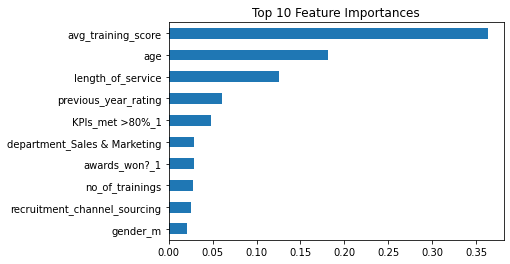

In [585]:
pd.Series(
    rf_promotion.feature_importances_,
    index=X_train_dummy.columns
    ).sort_values().tail(10).plot.barh(title="Top 10 Feature Importances")

From the plot above, top three features based on their importance are:

1. `avg_training_score`
2. `age`
3. `length_of_service`

### Dive Deeper: Model Improvement

In the previous section, you have tried to make improvements in Decision Tree model using Grid Search or Random Search technique. Using the same approach, try to refine your Random Forest model with the following conditions:

- Use original data, over sampling, or down sampling data for model fitting
- Use `RandomForestClassifier(n_estimators=10, random_state=14)` for base model estimator and number of `cv=3`.
- If you use Grid search technique, please consider the range of values for each parameter. To reduce computation time, you can use a small range of numbers.
- If you use Random search technique, you can set `n_iter` parameter with 10.

In [586]:
# your code here
